# Advanced: Continuing Emcee from a Previous Run

**NOTE**: support for `continue_from` was fixed in PHOEBE 2.3.11.  Earlier version may raise an error while running this notebook.

## Setup

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

In [2]:
import phoebe
from phoebe import u # units
import numpy as np

logger = phoebe.logger('error')

We'll then start with the bundle from the end of the [emcee tutorial](./emcee.ipynb).  If you're running this notebook locally, you will need to run that first to create the `emcee_advanced_tutorials.bundle` file that we will use here.

In [3]:
b = phoebe.load('emcee_advanced_tutorials.bundle')

## continue_from parameter

Once we have an existing solution(s) in the bundle that used emcee, the `continue_from` parameter (in the emcee solver) will have those available as valid options.

In [4]:
print(b.solvers, b.solutions)

['emcee_solver'] ['emcee_sol']


In [5]:
print(b.filter(solver='emcee_solver', context='solver'))

ParameterSet: 12 parameters
     comments@emcee_solver@solver: 
      compute@emcee_solver@solver: fastcompute
   continue_from@emcee_solver@...: None
    init_from@emcee_solver@solver: ['ball_around_guess']
   init_from_combine@emcee_sol...: first
       priors@emcee_solver@solver: []
     nwalkers@emcee_solver@solver: 12
       niters@emcee_solver@solver: 250
   burnin_factor@emcee_solver@...: 2.0
   thin_factor@emcee_solver@so...: 0.5
   progress_every_niters@emcee...: 0
   expose_failed@emcee_solver@...: True


In [6]:
print(b.get_parameter(qualifier='continue_from', solver='emcee_solver'))

Parameter: continue_from@emcee_solver@solver
                       Qualifier: continue_from
                     Description: continue the MCMC run from an existing emcee solution.  Chains will be appended to existing chains (so it is safe to overwrite the existing solution).  If None, will start a new run using init_from.
                           Value: None
                         Choices: None, emcee_sol
                  Constrained by: 
                      Constrains: None
                      Related to: None



By setting this to the existing solution, we will know longer have options for `nwalkers`, `init_from`, or `init_from_combine`.  Instead, the new run will use the same number of walkers as the previous run (to change the number of walkers, [resample emcee from a previous run](./emcee_resampling.ipynb) instead) and will continue with the parameters exactly where the left-off in the latest iteration.

In [7]:
b.set_value('continue_from', 'emcee_sol')

In [8]:
print(b.filter(solver='emcee_solver', context='solver'))

ParameterSet: 8 parameters
     comments@emcee_solver@solver: 
      compute@emcee_solver@solver: fastcompute
   continue_from@emcee_solver@...: emcee_sol
       priors@emcee_solver@solver: []
       niters@emcee_solver@solver: 250
   burnin_factor@emcee_solver@...: 2.0
   thin_factor@emcee_solver@so...: 0.5
   progress_every_niters@emcee...: 0


Note that `niters` now defines the number of **additional iterations**.

In [9]:
b.set_value('niters', solver='emcee_solver', context='solver', value=50)

## run_solver

In [10]:
b.run_solver('emcee_solver', solution='emcee_sol_contd')

  2%|▏         | 1/50 [00:02<02:07,  2.60s/it]/home/kyle/.local/lib/python3.8/site-packages/phoebe/parameters/parameters.py:3729: RuntimeWarning: overflow encountered in exp
  sigmas2 += model_interp.value ** 2 * np.exp(2 * sigmas_lnf)
/home/kyle/.local/lib/python3.8/site-packages/phoebe/parameters/parameters.py:3729: RuntimeWarning: overflow encountered in exp
  sigmas2 += model_interp.value ** 2 * np.exp(2 * sigmas_lnf)
  4%|▍         | 2/50 [00:05<02:11,  2.74s/it]/home/kyle/.local/lib/python3.8/site-packages/phoebe/parameters/parameters.py:3729: RuntimeWarning: overflow encountered in exp
  sigmas2 += model_interp.value ** 2 * np.exp(2 * sigmas_lnf)
  8%|▊         | 4/50 [00:11<02:11,  2.86s/it]/home/kyle/.local/lib/python3.8/site-packages/phoebe/parameters/parameters.py:3729: RuntimeWarning: overflow encountered in exp
  sigmas2 += model_interp.value ** 2 * np.exp(2 * sigmas_lnf)
/home/kyle/.local/lib/python3.8/site-packages/phoebe/parameters/parameters.py:3729: RuntimeWarning: ov

<ParameterSet: 20 parameters | qualifiers: burnin, nwalkers, comments, samples, fitted_uniqueids, adopt_distributions, adopt_values, niters, wrap_central_values, progress, acceptance_fractions, lnprob_cutoff, autocorr_times, fitted_units, adopt_parameters, distributions_convert, failed_samples, fitted_twigs, lnprobabilities, thin>

To overwrite the existing solution, we could have passed `solution='emcee_sol', overwrite=True`.

## Solution

Now if we look at the original and new solution, we can see that the chains have been extended by `niters` iterations.

In [11]:
print(b.filter(qualifier='niters', context='solution'))

ParameterSet: 2 parameters
R       niters@emcee_sol@solution: 250
R  niters@emcee_sol_contd@solu...: 300


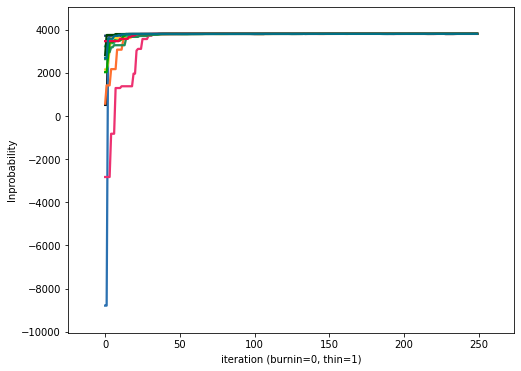

In [12]:
_ = b.plot(solution='emcee_sol', style='lnprobability', burnin=0, thin=1, show=True)

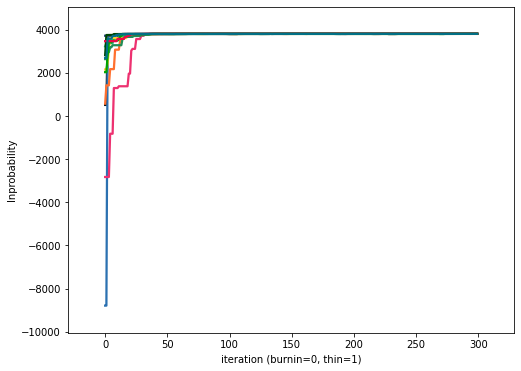

In [13]:
_ = b.plot(solution='emcee_sol_contd', style='lnprobability', burnin=0, thin=1, show=True)

## See Also

See the following for even more advanced use cases of emcee.

* [Advanced: resampling emcee from a previous run](./emcee_resample.ipynb)